In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.listdir('/content/drive/MyDrive/NLP/Sentiment Analysis'))

['Sentiment Analysis on IMDB Dataset.ipynb', 'IMDB Dataset.csv']


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/NLP/Sentiment Analysis/IMDB Dataset.csv') 

In [ ]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
data.shape

(50000, 2)

In [ ]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

# Splitting Dataset 

In [ ]:
#Train Dataset
train_reviews=data.review[:40000]
train_sentiments=data.sentiment[:40000]
#test dataset
test_reviews=data.review[40000:]
test_sentiments=data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [ ]:
from bs4 import BeautifulSoup
import re 

# Removing Tags

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
data['review']=data['review'].apply(denoise_text)

# Removing Special Characters

In [ ]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
data['review']=data['review'].apply(remove_special_characters)

# Stemming

In [ ]:
import nltk
nltk.download('punkt')
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
data['review']=data['review'].apply(simple_stemmer)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize

# Removing Stop Words

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
data['review']=data['review'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'yours', 'when', 'and', 'against', 'down', 'than', 'doing', 'at', 'most', "isn't", 'weren', 'out', "that'll", 'm', 'the', "wasn't", 'his', 'to', 'all', 'he', 'myself', 'off', 'have', 'they', 'yourself', 'd', "haven't", 'she', 'other', 'about', 'doesn', 'hadn', 'some', 'for', 'herself', 'where', 'wasn', 'so', 'who', 'there', 'above', "don't", 'not', "hadn't", 'on', 'haven', 'themselves', 'll', 'mightn', "you'll", 'an', "aren't", 'or', 'just', 'few', "weren't", 'which', 'couldn', "hasn't", 'why', 'am', 'no', "doesn't", 're', 's', "you'd", 'needn', 'himself', 'theirs', 'same', "mightn't", 'mustn', 'o', 'more', 'before', 'them', 'had', 'shan', 'further', 't', 'won', 'should', 'wouldn', 'below', "wouldn't", 'of', 'shouldn', 'being', 'my', 'aren', 'were', 'any', "couldn't", "shan't", 'only', 'their', 'once', 'that', "it's", 'your', 'because', 'was', 'over', 'ma', 'ain', 'ourselves', 'during', "should've", 'with', 'him', 'until', 'do', 'those', 'a', 'we', 'ours', 'yourselves', 'both', 'its',

In [ ]:
norm_train_reviews=data.review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 oz episod youll hook right thi exactli happen meth first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focu mainli emerald citi experi section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injust crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi wat

In [ ]:
norm_test_reviews=data.review[40000:]
norm_test_reviews[41203]

'watch made televi film destruct waco texa wa obviou heavili slant toward claim david koresh wa murder child rape cult leader hellbent kill mani cop want take hi peopl heaven blood stain stairwayth film wa littl propaganda detail alreadi read newspap sure sinc watch great documentari waco rule engag everi assert made thi film taken god truth tell whole stori rather regurgit onli law enforc decid tellfor forgot koresh wa spiritu leader religi movement name branch davidian charg drug use kidnap illeg weapon ownership statutori rape among im sure rai suspicion local polic later feder law enforc attempt serv search warrant atf bureau alcohol tobacco firearm clan particip shoot left decea wound sidesit wa feder bureau investig fbi got involv commun two spirit eventu broke fbi prepar inva assault build flashbang grenad ga build burnt ground kill mani within includ koresh fbi refu admit respon say cult insid must set fire themselv thi hearken imag jim jone violent religi organizationsth pictu

# Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)


BOW_cv_train: (40000, 6195849)
BOW_cv_test: (10000, 6195849)


# Tfidf Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6195849)
Tfidf_test: (10000, 6195849)


In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [ ]:
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


# Training on Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


# Prediction on Test set

In [ ]:
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
lr_bow_score=accuracy_score(lr_bow_predict,test_sentiments)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7511
lr_tfidf_score : 0.751


In [ ]:
cv_test_reviews.shape

(40000, 6195849)

In [ ]:
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [ ]:
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3766 1241]
 [1248 3745]]
[[3675 1332]
 [1158 3835]]


# Confusion Matrix

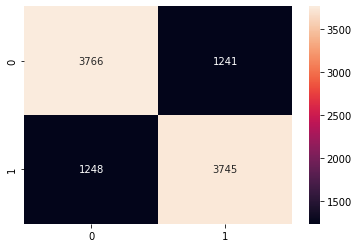

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
confusion_matrix = cm_bow
sns.heatmap(confusion_matrix,annot = True,fmt='d')

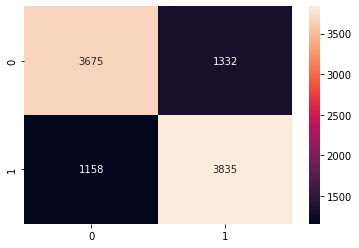

In [ ]:
fig = plt.figure()
confusion_matrix = cm_tfidf
sns.heatmap(confusion_matrix,annot = True,fmt='d')